# RKDE (Robust Kernel Density Estimation)

## Generating  the data set

In [38]:
import numpy as np 
import matplotlib.pyplot as plt

# Define the number of points
n_samples = 250

mu1, sigma1 = 0,1 # mean and variance
mu2, sigma2 = 10,1

x1 = np.random.normal(mu1,np.sqrt(sigma1),n_samples)
x2 = np.random.normal(mu2,np.sqrt(sigma2),n_samples)

def pdf(loc,variance,observation):
    '''Giving the Probability Density Function

    Parameters
    ----------
        loc (Int): Mean of the distribution ; where the peak of the bell exists
        variance(Int) : variance
        sample (Array) : the distribution

    Returns
    -------
        ndrray: Gaussian distribution
    '''
    # A normal continuous random variable.
    s1 = 1/(np.sqrt(2*np.pi*variance))
    s2 = np.exp(-(np.square(observation - loc)/(2*variance)))
    return s1 * s2 

# Adding outliers
outliers = np.random.randint(-5,15,40)
""" x1 = np.append(x1,outliers[:21])
x2 = np.append(x2,outliers[21:])
 """
X = np.array(list(x1) + list(x2))
X = np.append(X, outliers)
np.random.shuffle(X)
print("Dataset Shape: ", X.shape)
n_samples_final = X.shape[0]

Dataset Shape:  (540,)


### Visualize the training data

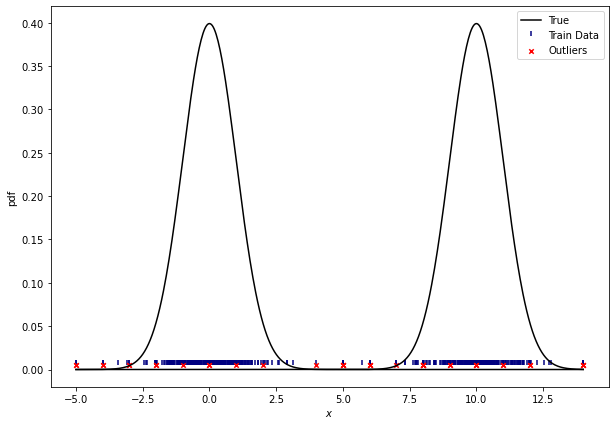

In [48]:
bins = np.linspace(np.min(X),np.max(X),n_samples_final)

plt.figure(figsize=(10,7))
plt.xlabel("$x$")
plt.ylabel("pdf")

plt.scatter(X,[.005] * len(X), color='navy', s=30, marker=2, label="Train Data")
plt.scatter(outliers,[.005] * len(outliers), color='red', s=20, marker='x', label="Outliers")


plt.plot(bins, pdf(mu1,sigma1,bins), color='black', label="True")
plt.plot(bins, pdf(mu2,sigma2,bins), color='black')

plt.legend()
plt.show()

## Applying KDE (Kernel Density Estimation)

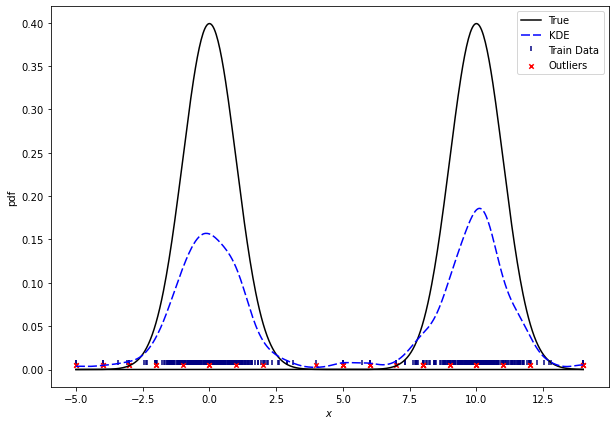

In [40]:
def kernel_function(obs,givenData,h,d=1):
    """ Kernel Function

    Parameters
    ----------
        obs (Int): Observation data
        h (Int): variance of the distribution
        d (Int, optional): dimension
        givenData (Int): Gaussian value
    
    Returns
    -------
        Int: kernel value   
    """
    result = (h**2 * 2*np.pi)**(-d/2) *np.exp((-1/2)* ((obs - givenData)/h)**2)
    return result

def kernel_density_function(obs_data,givenData,h=.1,d=1):
    '''Kernel Density Function
    Parameters
    ----------
        obs_data (Array): Observation data  
        h (Int): windows size
        d (Int, optional): dimension
        givenData (Array): Gaussian values

    Returns
    -------
      Array: new data after applying kdf
    '''
    final_result = []
    # Size of the gaussian data
    size = len(givenData)
    for obs in obs_data:
        k_result = 0
        for g in givenData:
            k_result +=  (1/size) * kernel_function(obs,g,h)
        final_result.append(k_result)
    return final_result


""" variance = np.var(X)
print(variance) """
windows = (1/np.sqrt(n_samples_final)*10)
X_kde = kernel_density_function(bins,X,windows)
#X_kde2 = kernel_density_function(bins,(x2))

##### PLOTING ##########
plt.figure(figsize=(10,7))
plt.xlabel("$x$")
plt.ylabel("pdf")

plt.scatter(X,[.005] * len(X), color='navy', s=30, marker=2, label="Train Data")
plt.scatter(outliers,[.005] * len(outliers), color='red', s=20, marker='x', label="Outliers")

plt.plot(bins, pdf(mu1,sigma1,bins), color='black', label="True")
plt.plot(bins, pdf(mu2,sigma2,bins), color='black')

plt.plot(bins, X_kde, color='blue', label="KDE", dashes=[6,2])
#plt.plot(bins, X_kde2, color='blue', dashes=[6,2])

plt.legend()
plt.show()

## Applying RKDE (Robust Kernel Density Estimation)

#### Step1 : Initialize wi(0) . Let k = 1.

In [45]:
def generate_weights(_sum,n):
    '''Generate n integers that sum up to a fixed number. 
    Ideally, the n numbers should be close to the mean of these numbers within a ~25% deviation.

    Parameters
    ----------
        _sum (int): the fixed sum of the weights  
        n (Int): number of weight

    Returns
    -------
      Array: the weights
    '''
    mean = _sum / n
    variance = float(.25 * mean)

    min_v = mean - variance
    max_v = mean + variance

    array = [min_v] * n

    diff = _sum - min_v * n
    while diff > 0 :
        a = np.random.randint(0,n-1)
        if array[a] >= max_v:
            continue
        array[a] += 1
        diff -= 1
    return array

w_0 = generate_weights(100,n_samples_final)
print(w_0)
#numbers = np.random.multinomial(100,np.ones(240)/240, size=1)[0]

[1.1388888888888888, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 1.1388888888888888, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 1.1388888888888888, 0.1388888888888889,

## Step 2

In [42]:
# k is the number of iteration
k = 1

operand_1 = kernel_function(X[k-1],X[k-1],windows)
print(operand_1)

def operand_2_func(weights,X,size_dist,windows):
    '''Generate operand 2

    Parameters
    ----------
        weights (array): the weights  
        X (array): the distribution
        windows (int): Windows size

    Returns
    -------
      int: operand 2
    '''
    result = []
    for j in range(size_dist):
       result.append(-2*weights[j]*kernel_function(X[k-1],X[j],windows))
       #print(result)
    return result
operand_2 = operand_2_func(w_0,X,n_samples_final,windows)
#print(operand_2)
def operand_3_func(weights,X, size_dist,windows):

  '''Generate operand 3

    Parameters
    ----------
        weights (array): the weights  
        X (array): the distribution
        windows (int): Windows size
    Returns
    -------
      int: operand 3
    '''
  final_result = []
  for i in range(size_dist):
    result = 0
    for j in range(size_dist):
      result += weights[i]*weights[j]*kernel_function(X[i],X[j],windows)
    final_result.append(result)
  return final_result
operand_3 = operand_3_func(w_0,X,n_samples_final,windows)
#print(operand_3)
step2_result = np.sqrt(operand_1 + operand_2 + operand_3)


0.927058084855655


## Step 3

In [43]:
def huber_loss_func(value):
    alpha = 1
    if value < -alpha:
        return -alpha
    elif -alpha <= value and value <= alpha:
        return value
    else:
        return alpha

def update_weights(value):
    return huber_loss_func(value) / value

updated_weights = [update_weights(value) for value in step2_result]
print(updated_weights)

[0.7356367707050946, 0.5327597151908058, 0.6564441392490225, 0.5641669722034295, 0.5351297322064295, 0.5597541585818328, 0.5712073117486284, 0.5657596616294649, 0.8364996349323189, 0.5867371448390916, 0.6407884893349359, 0.5392474361825946, 0.8544762906317619, 0.5393085764016682, 0.7850870124635382, 0.70759418877256, 0.5327157683451678, 0.6008602908683967, 0.8106203536559633, 0.6073447925659079, 0.7537438742827869, 0.5927886961638305, 0.5709929283764807, 0.5585445331737078, 0.6771559435993922, 0.5929443341753662, 0.8169187603966604, 0.5339573295272118, 0.5327436383545979, 0.6743675693783378, 1.0, 0.5780565284000876, 0.7067297057549111, 0.603871521416849, 0.7191108069914742, 0.560228854685379, 0.74309983562486, 0.5325424897404701, 1.0, 0.6502433983656706, 0.5647247552637531, 0.634533723330014, 0.2569382055628007, 0.6934195789910996, 0.6548143042447666, 0.5374877584582493, 0.5582407005054646, 0.7943879185596987, 0.695552075840991, 0.9987292269176753, 0.5683815985832992, 0.875594236253202

## Step 4 : Normalize the updated weights

In [46]:
def normalize_weight(updated_weights,sum_weights):
    '''Normalize weight

    Parameters
    ----------
        updated_weights (int): the weights  
        sum_weights (array): summation of the initial weight

    Returns
    -------
      int:  normalized weight
    '''
    return updated_weights / sum_weights

normalized_weights = [normalize_weight(weight,sum(updated_weights)) for weight in updated_weights]
print(normalized_weights)

1.0000000000000002


## Step 5 : If the algorithm converges